In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import seaborn as sns
from scipy import stats

In [102]:
df = pd.read_csv("C:/Users/prathyusha/OneDrive/Documents/spotify_data_2021.csv")
df

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
1,1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,37,0.429,0.829,6,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.278,127.083,1472769,4
2,2,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,90,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.002940,0.1170,0.881,107.998,172627,4
3,3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.001080,0.1060,0.966,138.978,196680,4
4,4,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,0.849,0.424,5,-9.579,0,0.3240,0.06350,0.000000,0.0834,0.153,145.887,242966,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Ferry Corsten,I Don't Need You (RES006),2n8l2EpPMVluTolZO4o9tQ,9,0.619,0.809,9,-7.013,0,0.0319,0.00186,0.003150,0.1020,0.159,124.015,186232,4
952,952,Fast Distance,Summer Breeze (RES006),4dCWOgRJJnYSJ2Kja0VxC7,7,0.697,0.823,0,-7.149,1,0.0402,0.04120,0.311000,0.1470,0.435,126.007,182863,4
953,953,Cico P,Tampa,4tB6ApBRk7JEBKet5mRFF3,66,0.888,0.407,8,-10.158,0,0.4870,0.15700,0.000000,0.0914,0.751,77.031,176160,4
954,954,Ferry Corsten,Poison (RES006),14V53WCwOSNKdzRh09MGRs,8,0.531,0.933,7,-8.284,1,0.0361,0.00157,0.493000,0.1970,0.042,125.000,328560,4


In [103]:
df.head(20)

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.6880,166.928,178147,4
1,1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,37,0.429,0.829,6,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.2780,127.083,1472769,4
2,2,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,90,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.002940,0.1170,0.8810,107.998,172627,4
3,3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.001080,0.1060,0.9660,138.978,196680,4
4,4,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,0.849,0.424,5,-9.579,0,0.3240,0.06350,0.000000,0.0834,0.1530,145.887,242966,4
5,5,Jay Sean,2012 (It Ain't The End),1ERCOXHQcoLSTlgmNTlcrR,55,0.717,0.792,0,-2.703,1,0.0393,0.19900,0.000000,0.4230,0.5130,126.975,222200,4
6,6,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,81,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.2520,196.000,178520,3
7,7,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,7h7yPyss4MIBVPXVeF83vg,23,0.887,0.633,8,-10.453,1,0.0660,0.06290,0.922000,0.0637,0.8490,130.023,176363,4
8,8,Lil Nas X,THATS WHAT I WANT,0e8nrvls4Qqv5Rfa2UhqmO,89,0.737,0.846,1,-4.510,0,0.2200,0.00614,0.000000,0.0486,0.5460,87.981,143901,4
9,9,Years & Years,Starstruck,52GSEP6kryUL4ZGCE0P8Y2,0,0.555,0.879,9,-2.484,0,0.0983,0.01100,0.000000,0.2980,0.6910,113.852,207755,4


In [104]:
df.shape

(956, 18)

In [105]:
df.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02,956.000000
mean,477.500000,45.940377,0.599347,0.686415,5.008368,-7.751124,0.597280,0.095949,0.196718,0.212555,0.226374,0.464333,125.185493,1.925791e+05,3.917364
std,276.117729,30.024590,0.157784,0.211165,3.634035,3.288107,0.490702,0.094783,0.266478,0.350106,0.183497,0.252008,26.427865,1.041100e+05,0.361022
min,0.000000,0.000000,0.000000,0.004810,0.000000,-27.426000,0.000000,0.000000,0.000001,0.000000,0.012300,0.000000,0.000000,3.432000e+04,0.000000
25%,238.750000,14.750000,0.488000,0.559000,1.000000,-9.186500,0.000000,0.039200,0.003685,0.000000,0.103000,0.255000,110.001500,1.431575e+05,4.000000
50%,477.500000,45.500000,0.601500,0.704000,5.000000,-7.280500,1.000000,0.053900,0.061700,0.000042,0.144500,0.462000,126.013000,1.831850e+05,4.000000
75%,716.250000,74.000000,0.713000,0.862500,8.000000,-5.568750,1.000000,0.108250,0.301750,0.356250,0.317250,0.654250,138.013750,2.259945e+05,4.000000
max,955.000000,90.000000,0.964000,0.999000,11.000000,-1.307000,1.000000,0.619000,0.993000,0.996000,0.988000,0.977000,207.766000,1.472769e+06,5.000000


In [106]:
list(df.columns)

['Unnamed: 0',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [107]:
df.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [108]:
df = df.drop(columns=['key','time_signature','Unnamed: 0','track_id'])
df.shape

(956, 14)

In [109]:
df.isnull().sum()

artist_name         0
track_name          0
popularity          0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [110]:
df.count()

artist_name         956
track_name          956
popularity          956
danceability        956
energy              956
loudness            956
mode                956
speechiness         956
acousticness        956
instrumentalness    956
liveness            956
valence             956
tempo               956
duration_ms         956
dtype: int64

In [111]:
df.describe()

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02
mean,45.940377,0.599347,0.686415,-7.751124,0.597280,0.095949,0.196718,0.212555,0.226374,0.464333,125.185493,1.925791e+05
std,30.024590,0.157784,0.211165,3.288107,0.490702,0.094783,0.266478,0.350106,0.183497,0.252008,26.427865,1.041100e+05
min,0.000000,0.000000,0.004810,-27.426000,0.000000,0.000000,0.000001,0.000000,0.012300,0.000000,0.000000,3.432000e+04
25%,14.750000,0.488000,0.559000,-9.186500,0.000000,0.039200,0.003685,0.000000,0.103000,0.255000,110.001500,1.431575e+05
50%,45.500000,0.601500,0.704000,-7.280500,1.000000,0.053900,0.061700,0.000042,0.144500,0.462000,126.013000,1.831850e+05
75%,74.000000,0.713000,0.862500,-5.568750,1.000000,0.108250,0.301750,0.356250,0.317250,0.654250,138.013750,2.259945e+05
max,90.000000,0.964000,0.999000,-1.307000,1.000000,0.619000,0.993000,0.996000,0.988000,0.977000,207.766000,1.472769e+06


### top 10 Popular artist and tracks

In [112]:
print('10 Most popular Songs on spotify')
df[['track_name','artist_name','popularity']].sort_values(by='popularity', ascending=False)[:10]

10 Most popular Songs on spotify


,track_name,artist_name,popularity
0,good 4 u,Olivia Rodrigo,90
2,Woman,Doja Cat,90
27,abcdefu,GAYLE,90
120,Where Are You Now,Lost Frequencies,90
17,STAY (with Justin Bieber),The Kid LAROI,89
41,Cold Heart - PNAU Remix,Elton John,89
408,Jordan,Ryan Castro,89
144,Envolver,Anitta,89
8,THATS WHAT I WANT,Lil Nas X,89
43,The Motto,Tiësto,89


In [113]:
import warnings
warnings.filterwarnings('ignore')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

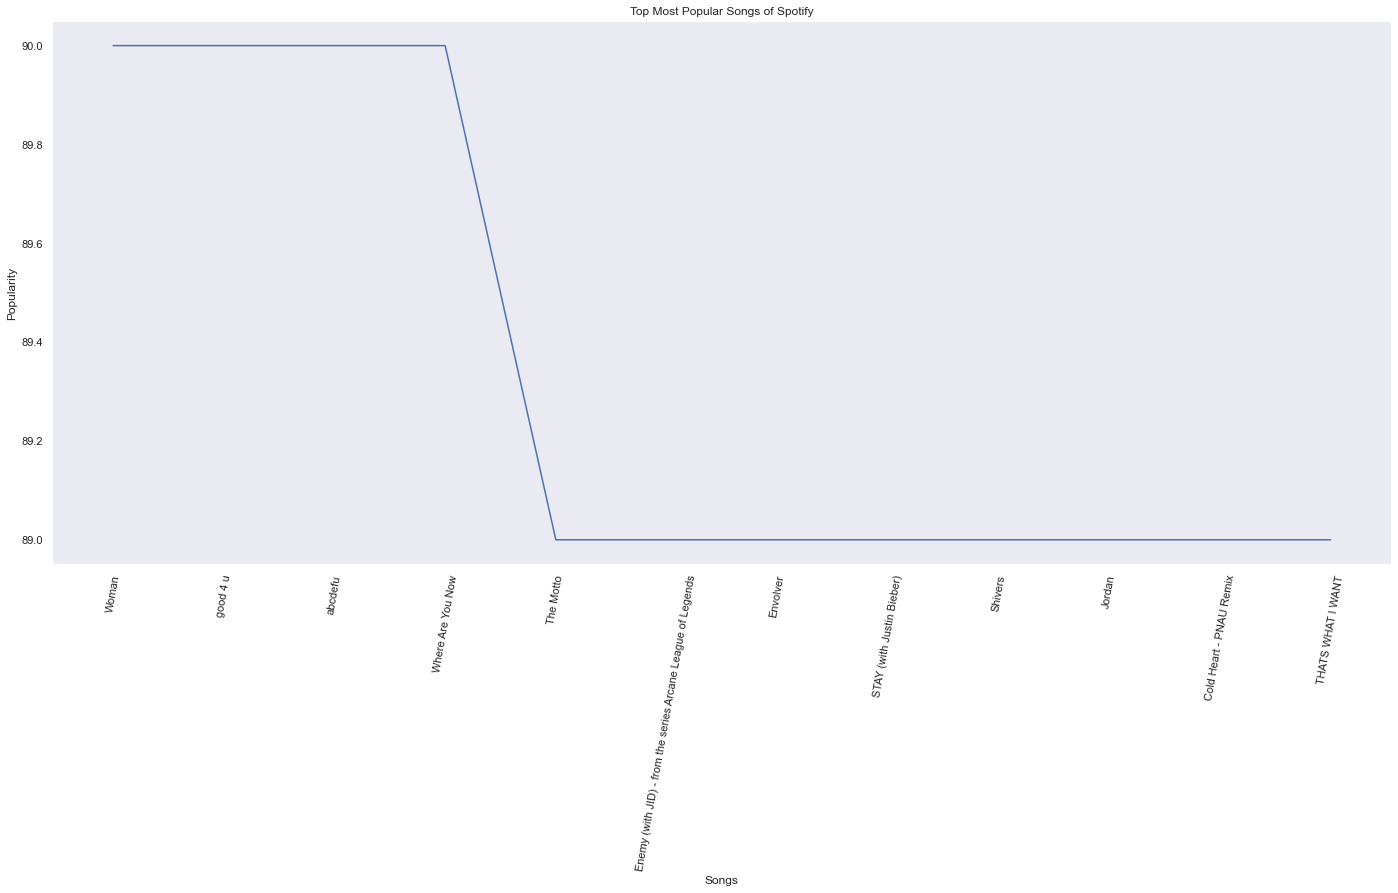

In [114]:
plt.figure(figsize=(24,10))
sns.set(style='dark')
x=df.groupby('track_name')["popularity"].max().sort_values(ascending=False).head(12)
ax= sns.lineplot(x.index,x)
ax.set_title('Top Most Popular Songs of Spotify')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')
plt.xticks(rotation=80)

Text(0.5, 0, 'Songs')

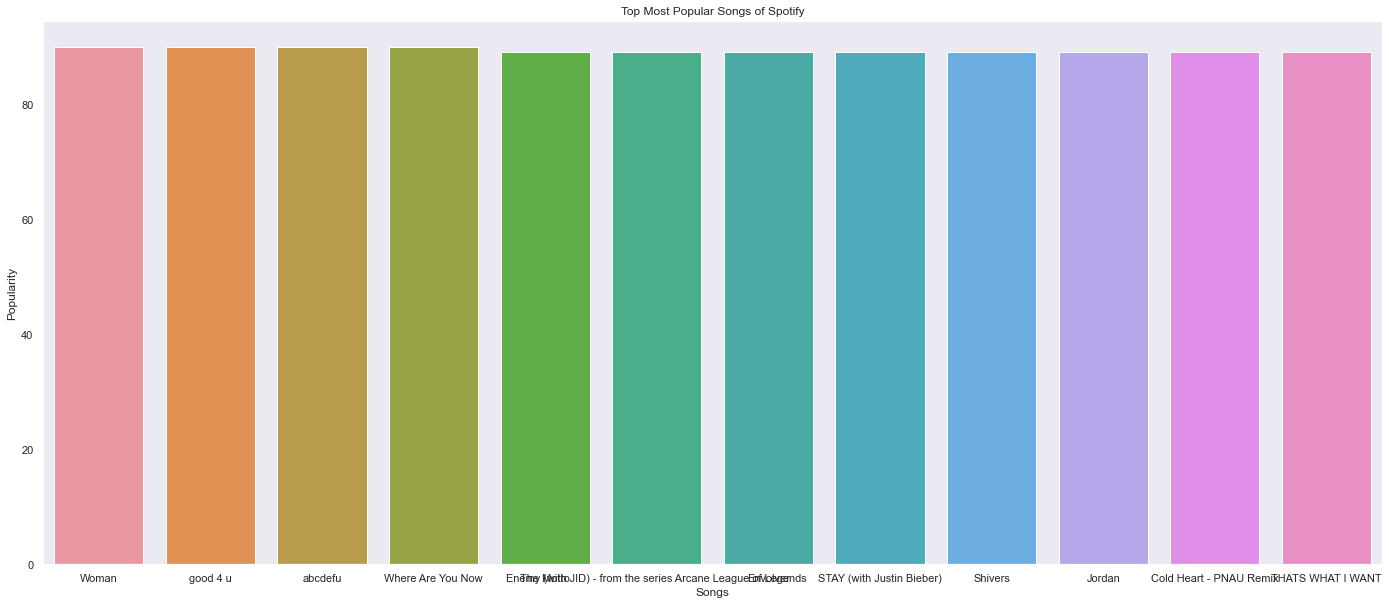

In [115]:
plt.figure(figsize=(24,10))
sns.set(style='dark')
x=df.groupby('track_name')["popularity"].max().sort_values(ascending=False).head(12)
ax= sns.barplot(x.index,x)
ax.set_title('Top Most Popular Songs of Spotify')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')


(array([88.8, 89. , 89.2, 89.4, 89.6, 89.8, 90. , 90.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

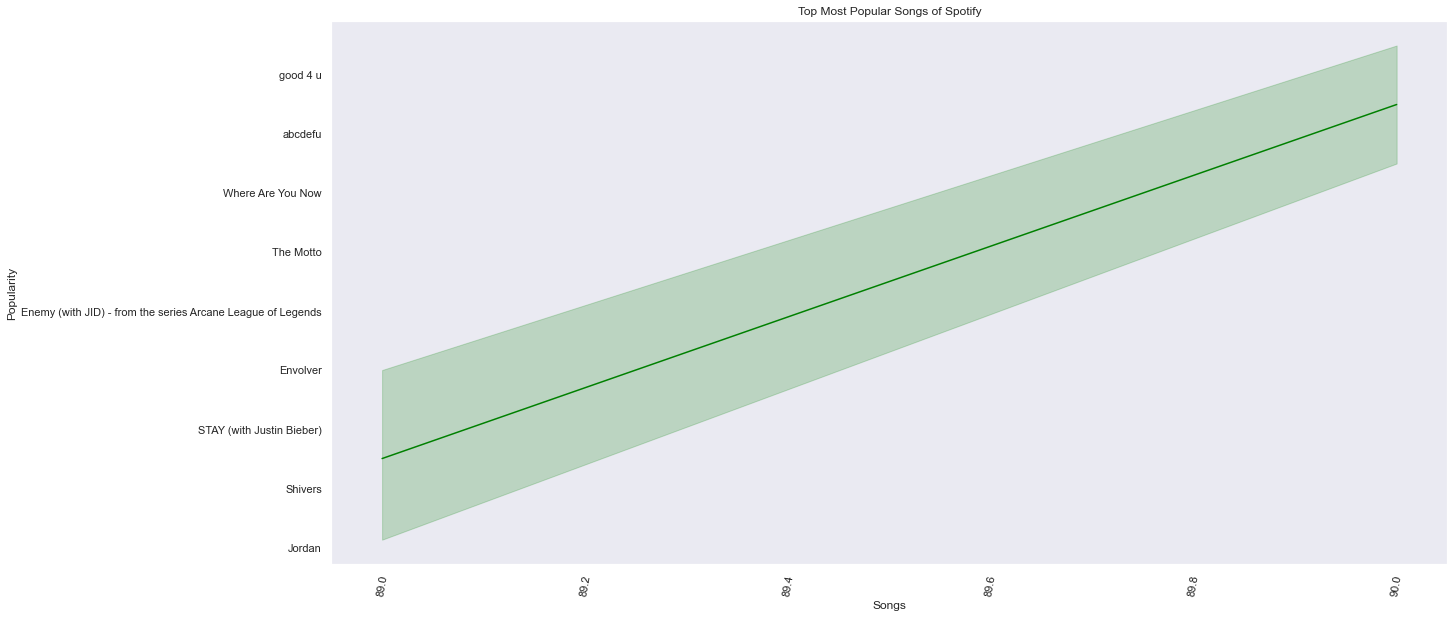

In [116]:
plt.figure(figsize=(20,10))
sns.set(style='dark')
x=df.groupby('track_name')["popularity"].max().sort_values(ascending=False).head(12)
ax= sns.lineplot(x,x.index, color='green')
ax.set_title('Top Most Popular Songs of Spotify')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Morgan Wallen'),
  Text(2, 0, 'Olivia Rodrigo'),
  Text(3, 0, 'Taylor Swift'),
  Text(4, 0, 'Yeat'),
  Text(5, 0, 'Billie Eilish'),
  Text(6, 0, 'Doja Cat'),
  Text(7, 0, 'Elvis Costello & The Attractions'),
  Text(8, 0, 'Armin van Buuren'),
  Text(9, 0, 'Tyler, The Creator'),
  Text(10, 0, 'Kanye West'),
  Text(11, 0, 'Baby Keem'),
  Text(12, 0, 'Lil Nas X'),
  Text(13, 0, 'Justin Bieber'),
  Text(14, 0, 'Grupo Firme'),
  Text(15, 0, 'Lil Tjay'),
  Text(16, 0, 'J. Cole'),
  Text(17, 0, 'DaBaby'),
  Text(18, 0, 'Polo G'),
  Text(19, 0, 'Nardo Wick')])

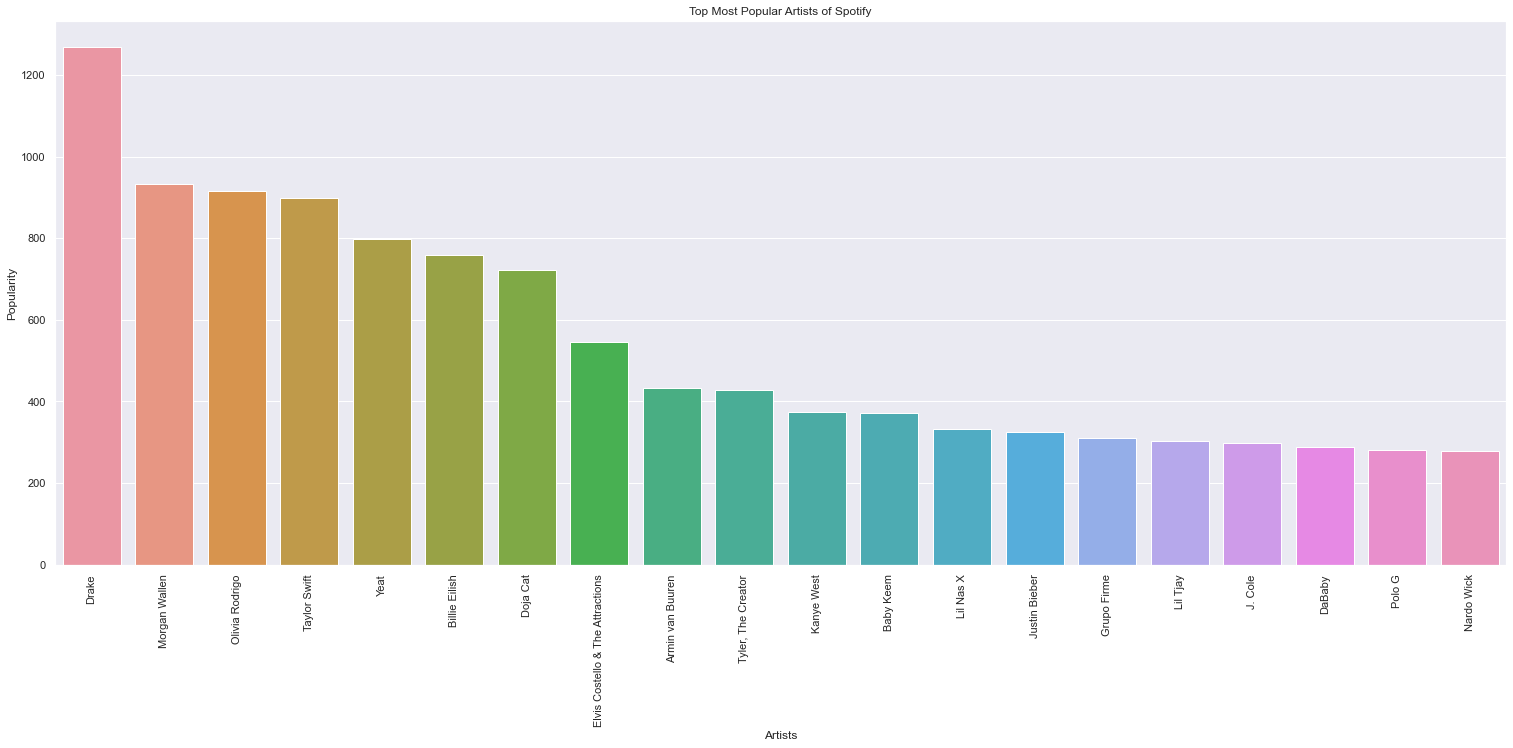

In [117]:
plt.figure(figsize=(26,10))
sns.set(style='darkgrid')
x=df.groupby('artist_name')["popularity"].sum().sort_values(ascending=False).head(20)
ax= sns.barplot(x.index,x)
ax.set_title('Top Most Popular Artists of Spotify')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

(array([ 200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

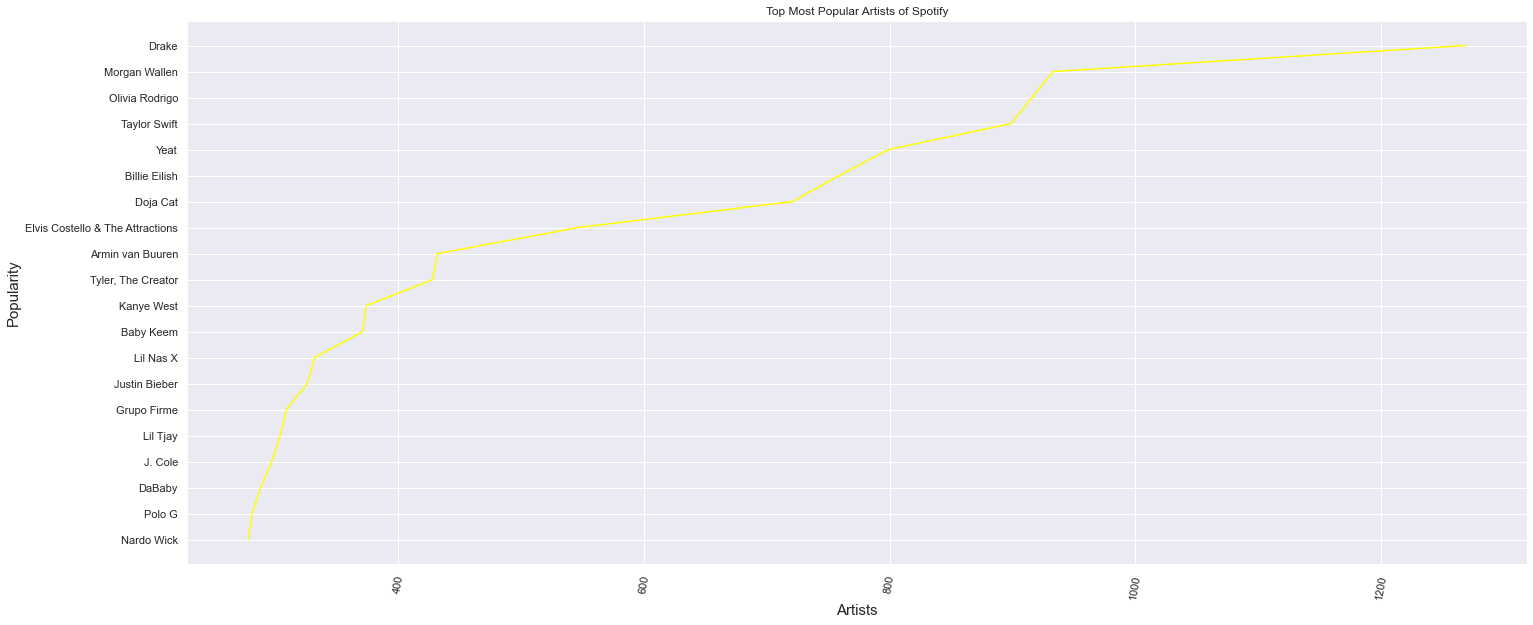

In [118]:
plt.figure(figsize=(24,10))
sns.set(style='darkgrid')
x=df.groupby('artist_name')["popularity"].sum().sort_values(ascending=False).head(20)
ax= sns.lineplot(x,x.index, color='yellow')
ax.set_title('Top Most Popular Artists of Spotify')
ax.set_ylabel('Popularity',fontsize=15)
ax.set_xlabel('Artists',fontsize=15)
plt.xticks(rotation=80)

In [119]:
song_count =df.artist_name.value_counts()[:10]
song_count

Elvis Costello & The Attractions    24
Drake                               17
Armin van Buuren                    16
Incognito                           15
Zornik                              15
Morgan Wallen                       13
015B                                12
Taylor Swift                        12
Olivia Rodrigo                      11
Yeat                                11
Name: artist_name, dtype: int64

### Which singer has the highest total duration of songs

In [120]:
x= pd.DataFrame(df.groupby('artist_name')['duration_ms'].sum())
x.sort_values('duration_ms').tail().reset_index()

,artist_name,duration_ms
0,Taylor Swift,3310928
1,Drake,4186580
2,Elvis Costello & The Attractions,4571611
3,Incognito,4767267
4,Zornik,5144586


In [121]:
gr_yr=df.groupby('instrumentalness')['popularity'].sum().sort_values(ascending=False).head(10)
gr_yr

instrumentalness
0.000000    23500
0.001110      164
0.000018      155
0.000004      153
0.000002      152
0.000022      148
0.000162      146
0.000036      145
0.850000      110
0.000166      109
Name: popularity, dtype: int64

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

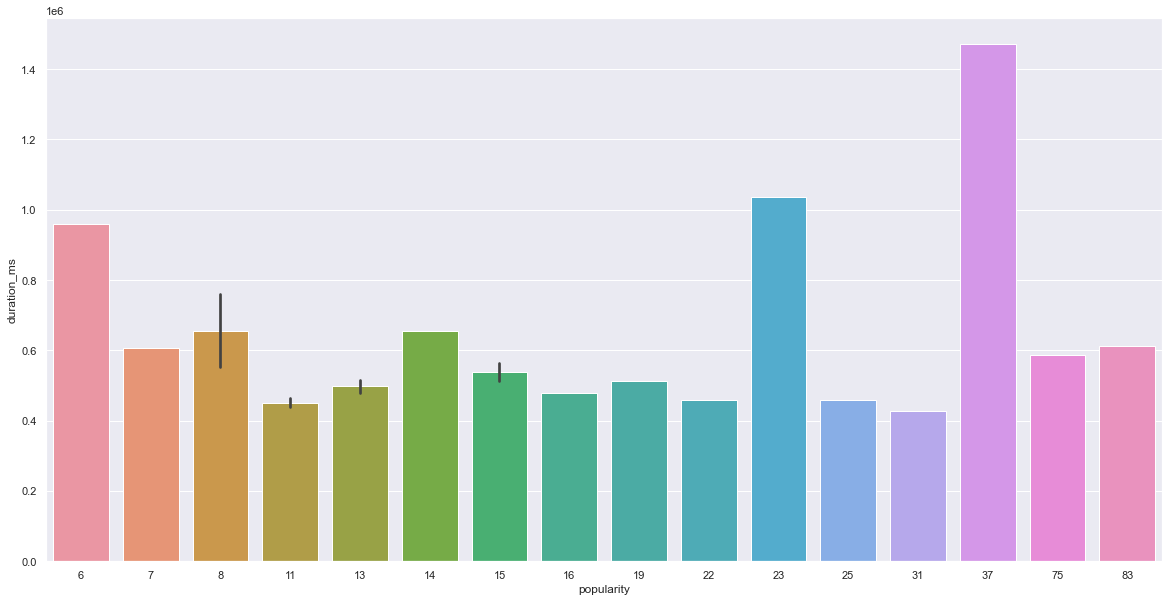

In [122]:
gr_yr = df.groupby('duration_ms').agg({'popularity':'sum'})
plt.figure(figsize=(20,10))
sns.barplot(x=gr_yr.popularity[-20:],y=gr_yr.index[-20:], data=gr_yr)

In [123]:
grouped_music=df['duration_ms'].groupby(df['popularity']).describe()
grouped_music

,count,mean,std,min,25%,50%,75%,max
popularity,,,,,,,,
0,7.0,200639.285714,60185.803093,104668.0,175754.50,207750.0,226428.00,287692.0
1,1.0,78766.000000,NaN,78766.0,78766.00,78766.0,78766.00,78766.0
2,3.0,178513.333333,29515.832096,155429.0,161885.00,168341.0,190055.50,211770.0
3,3.0,173959.000000,48785.103187,117627.0,159813.50,202000.0,202125.00,202250.0
4,4.0,191645.500000,40755.992905,156000.0,156777.00,189484.5,224353.00,231613.0
...,...,...,...,...,...,...,...,...
86,6.0,201621.833333,25097.866231,157890.0,194650.75,204321.0,221161.25,224997.0
87,4.0,260884.750000,38938.646992,215507.0,235386.50,264566.5,290064.75,298899.0
88,5.0,201685.600000,28607.324644,153190.0,206710.00,207301.0,212000.00,229227.0


(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

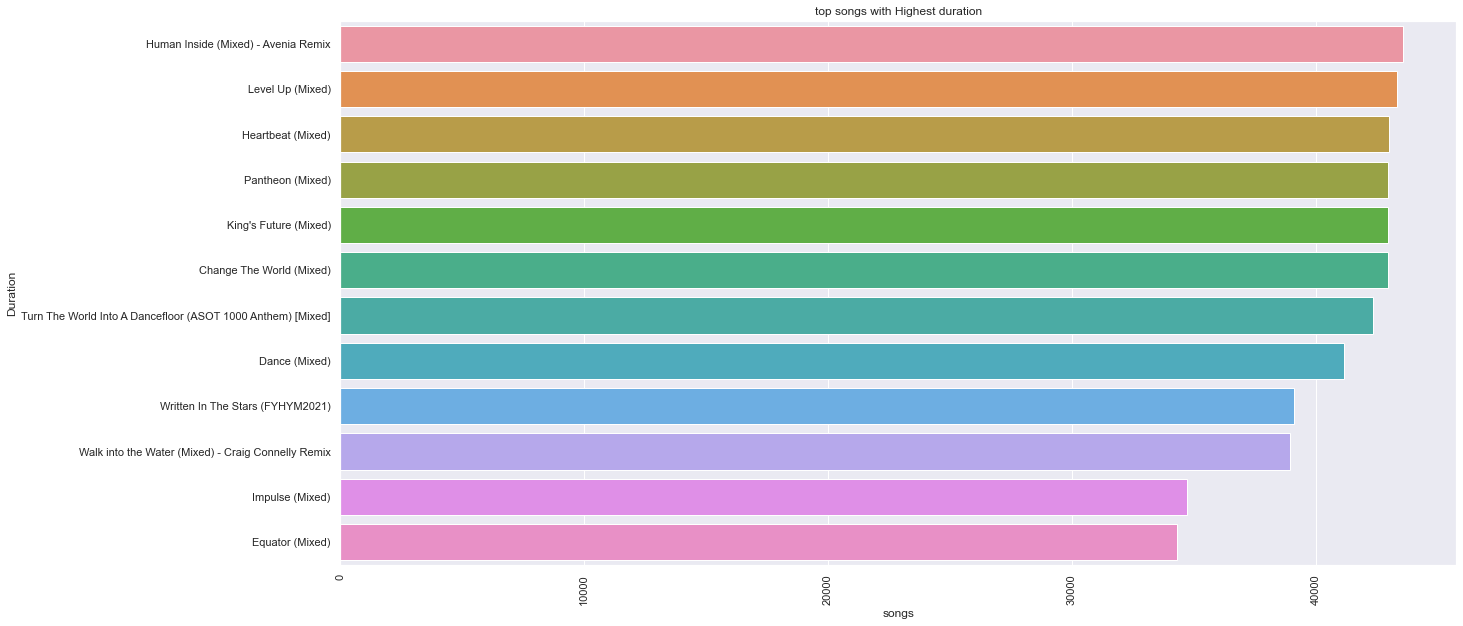

In [124]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
x=df.groupby('track_name')['duration_ms'].max().sort_values(ascending=False).tail(12)
ax = sns.barplot(x,x.index)
ax.set_title('top songs with Highest duration')
ax.set_ylabel('Duration')
ax.set_xlabel('songs')
plt.xticks(rotation=90)

Text(0, 0.5, 'Duration')

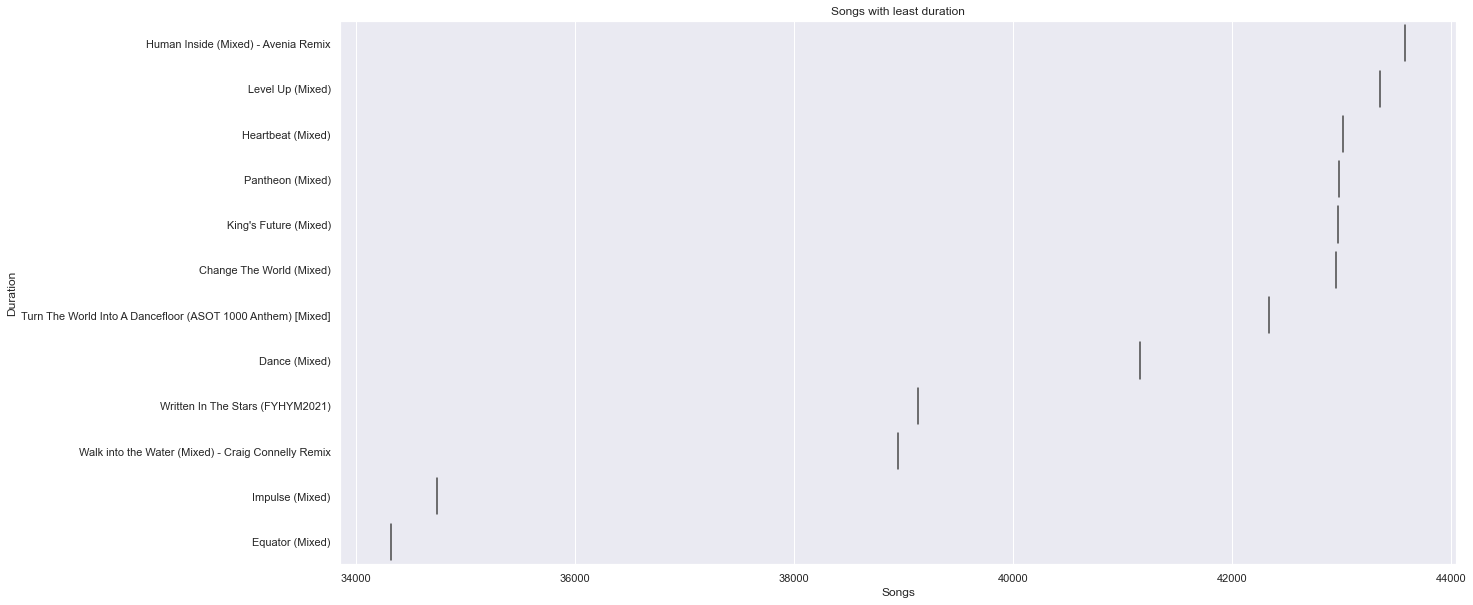

In [125]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
x=df.groupby('track_name')['duration_ms'].max().sort_values(ascending=False).tail(12)
ax=sns.violinplot(x,x.index)
ax.set_title('Songs with least duration')
ax.set_xlabel('Songs')
ax.set_ylabel('Duration')


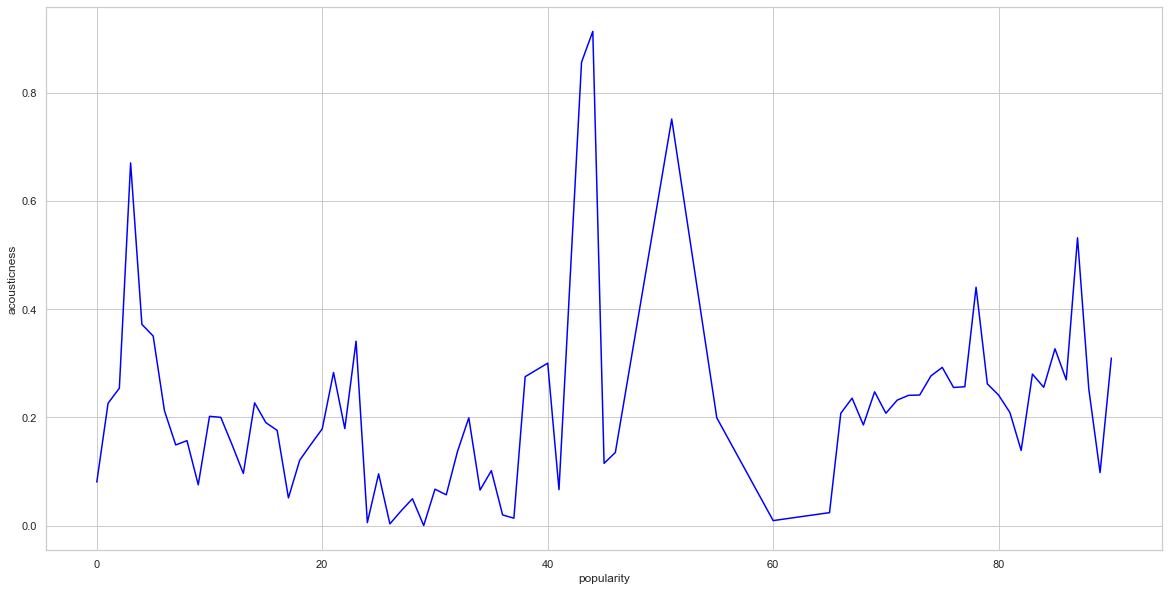

In [126]:
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
columns=['acousticness']
for col in columns:
    x=df.groupby('popularity')[col].mean()
    ax=sns.lineplot(x=x.index, y=x,color='blue')

Text(0, 0.5, 'Duration')

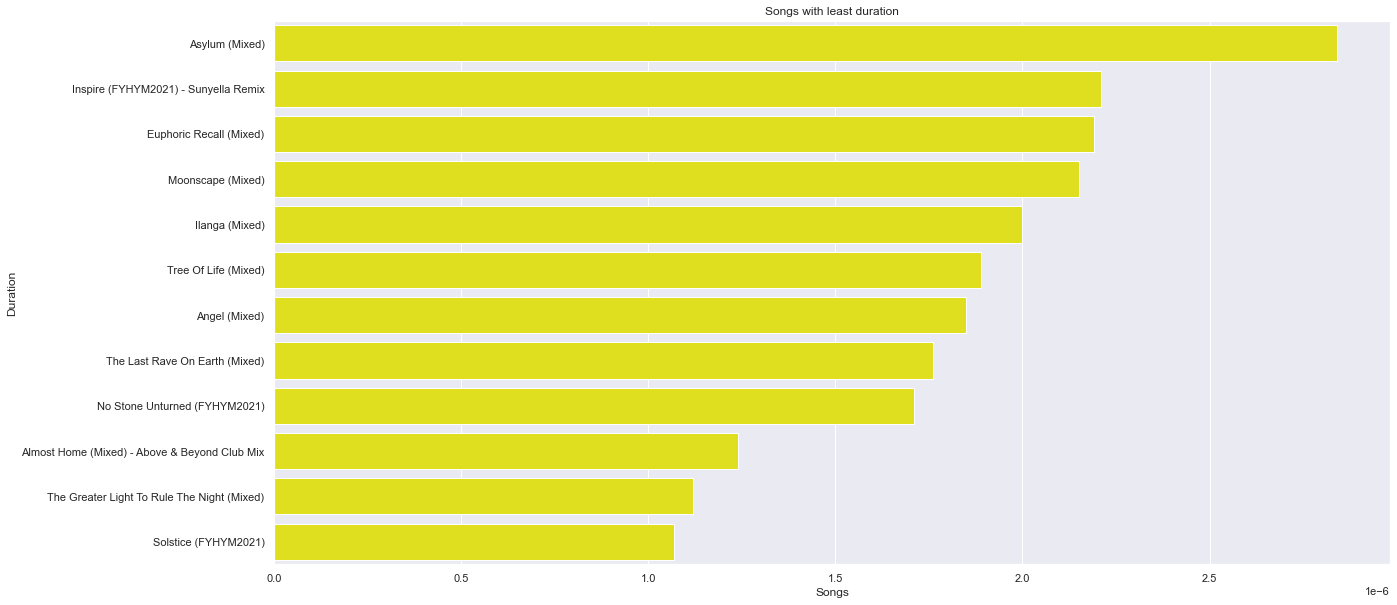

In [127]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
x=df.groupby('track_name')['acousticness'].max().sort_values(ascending=False).tail(12)
ax=sns.barplot(x,x.index,color='yellow')
ax.set_title('Songs with least duration')
ax.set_xlabel('Songs')
ax.set_ylabel('Duration')


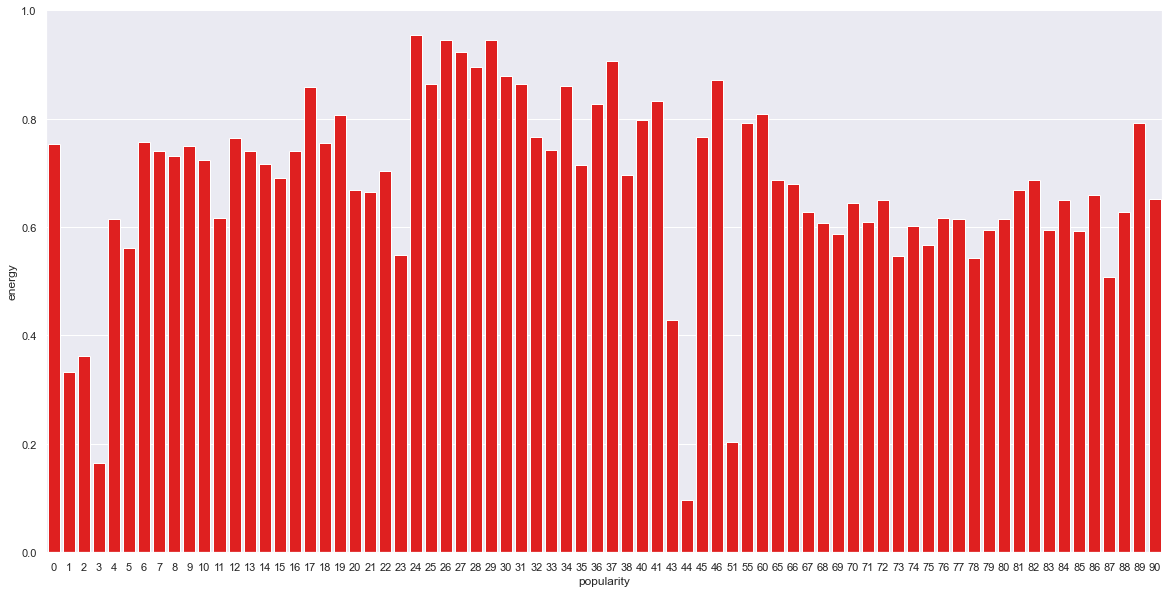

In [128]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
columns=['energy']
for col in columns:
    x =df.groupby('popularity')[col].mean()
    ax=sns.barplot(x=x.index,y=x,color='red')

Text(0, 0.5, 'Duration')

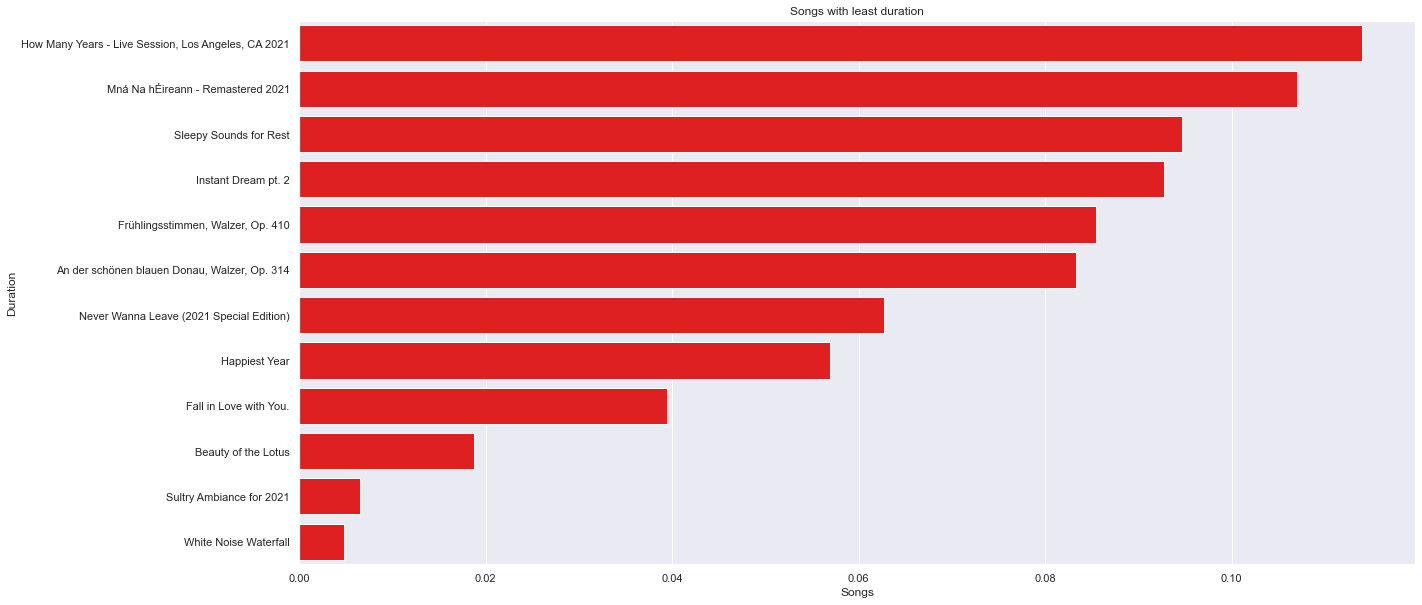

In [129]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
x=df.groupby('track_name')['energy'].max().sort_values(ascending=False).tail(12)
ax=sns.barplot(x,x.index,color='red')
ax.set_title('Songs with least duration')
ax.set_xlabel('Songs')
ax.set_ylabel('Duration')


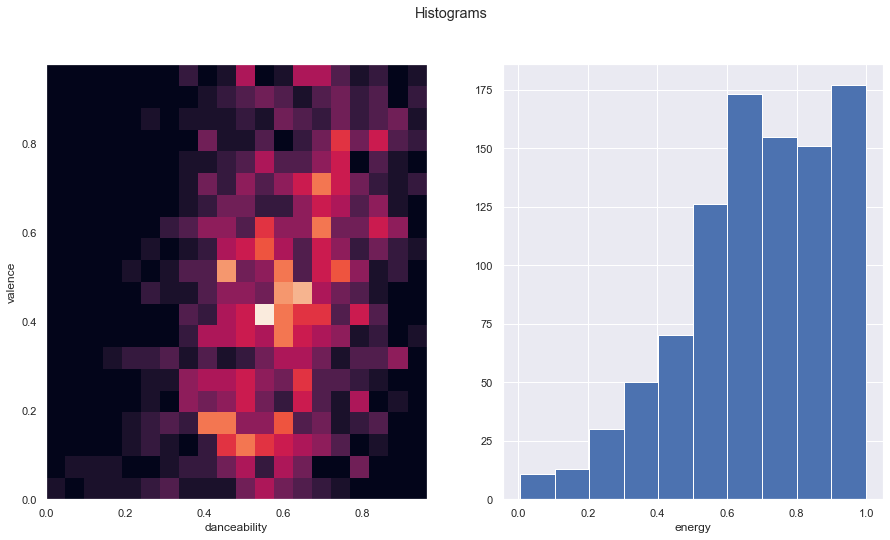

In [130]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(15, 8))
fig.suptitle("Histograms")
ax1.hist2d(df[x], df[y], bins=20)
ax2.hist(df["energy"])

ax1.set_xlabel(x)
ax1.set_ylabel(y)

ax2.set_xlabel("energy")

plt.show()

In [131]:
df['danceability'].value_counts()

0.678    6
0.503    6
0.615    6
0.531    6
0.576    6
        ..
0.609    1
0.351    1
0.149    1
0.000    1
0.888    1
Name: danceability, Length: 483, dtype: int64

<AxesSubplot:>

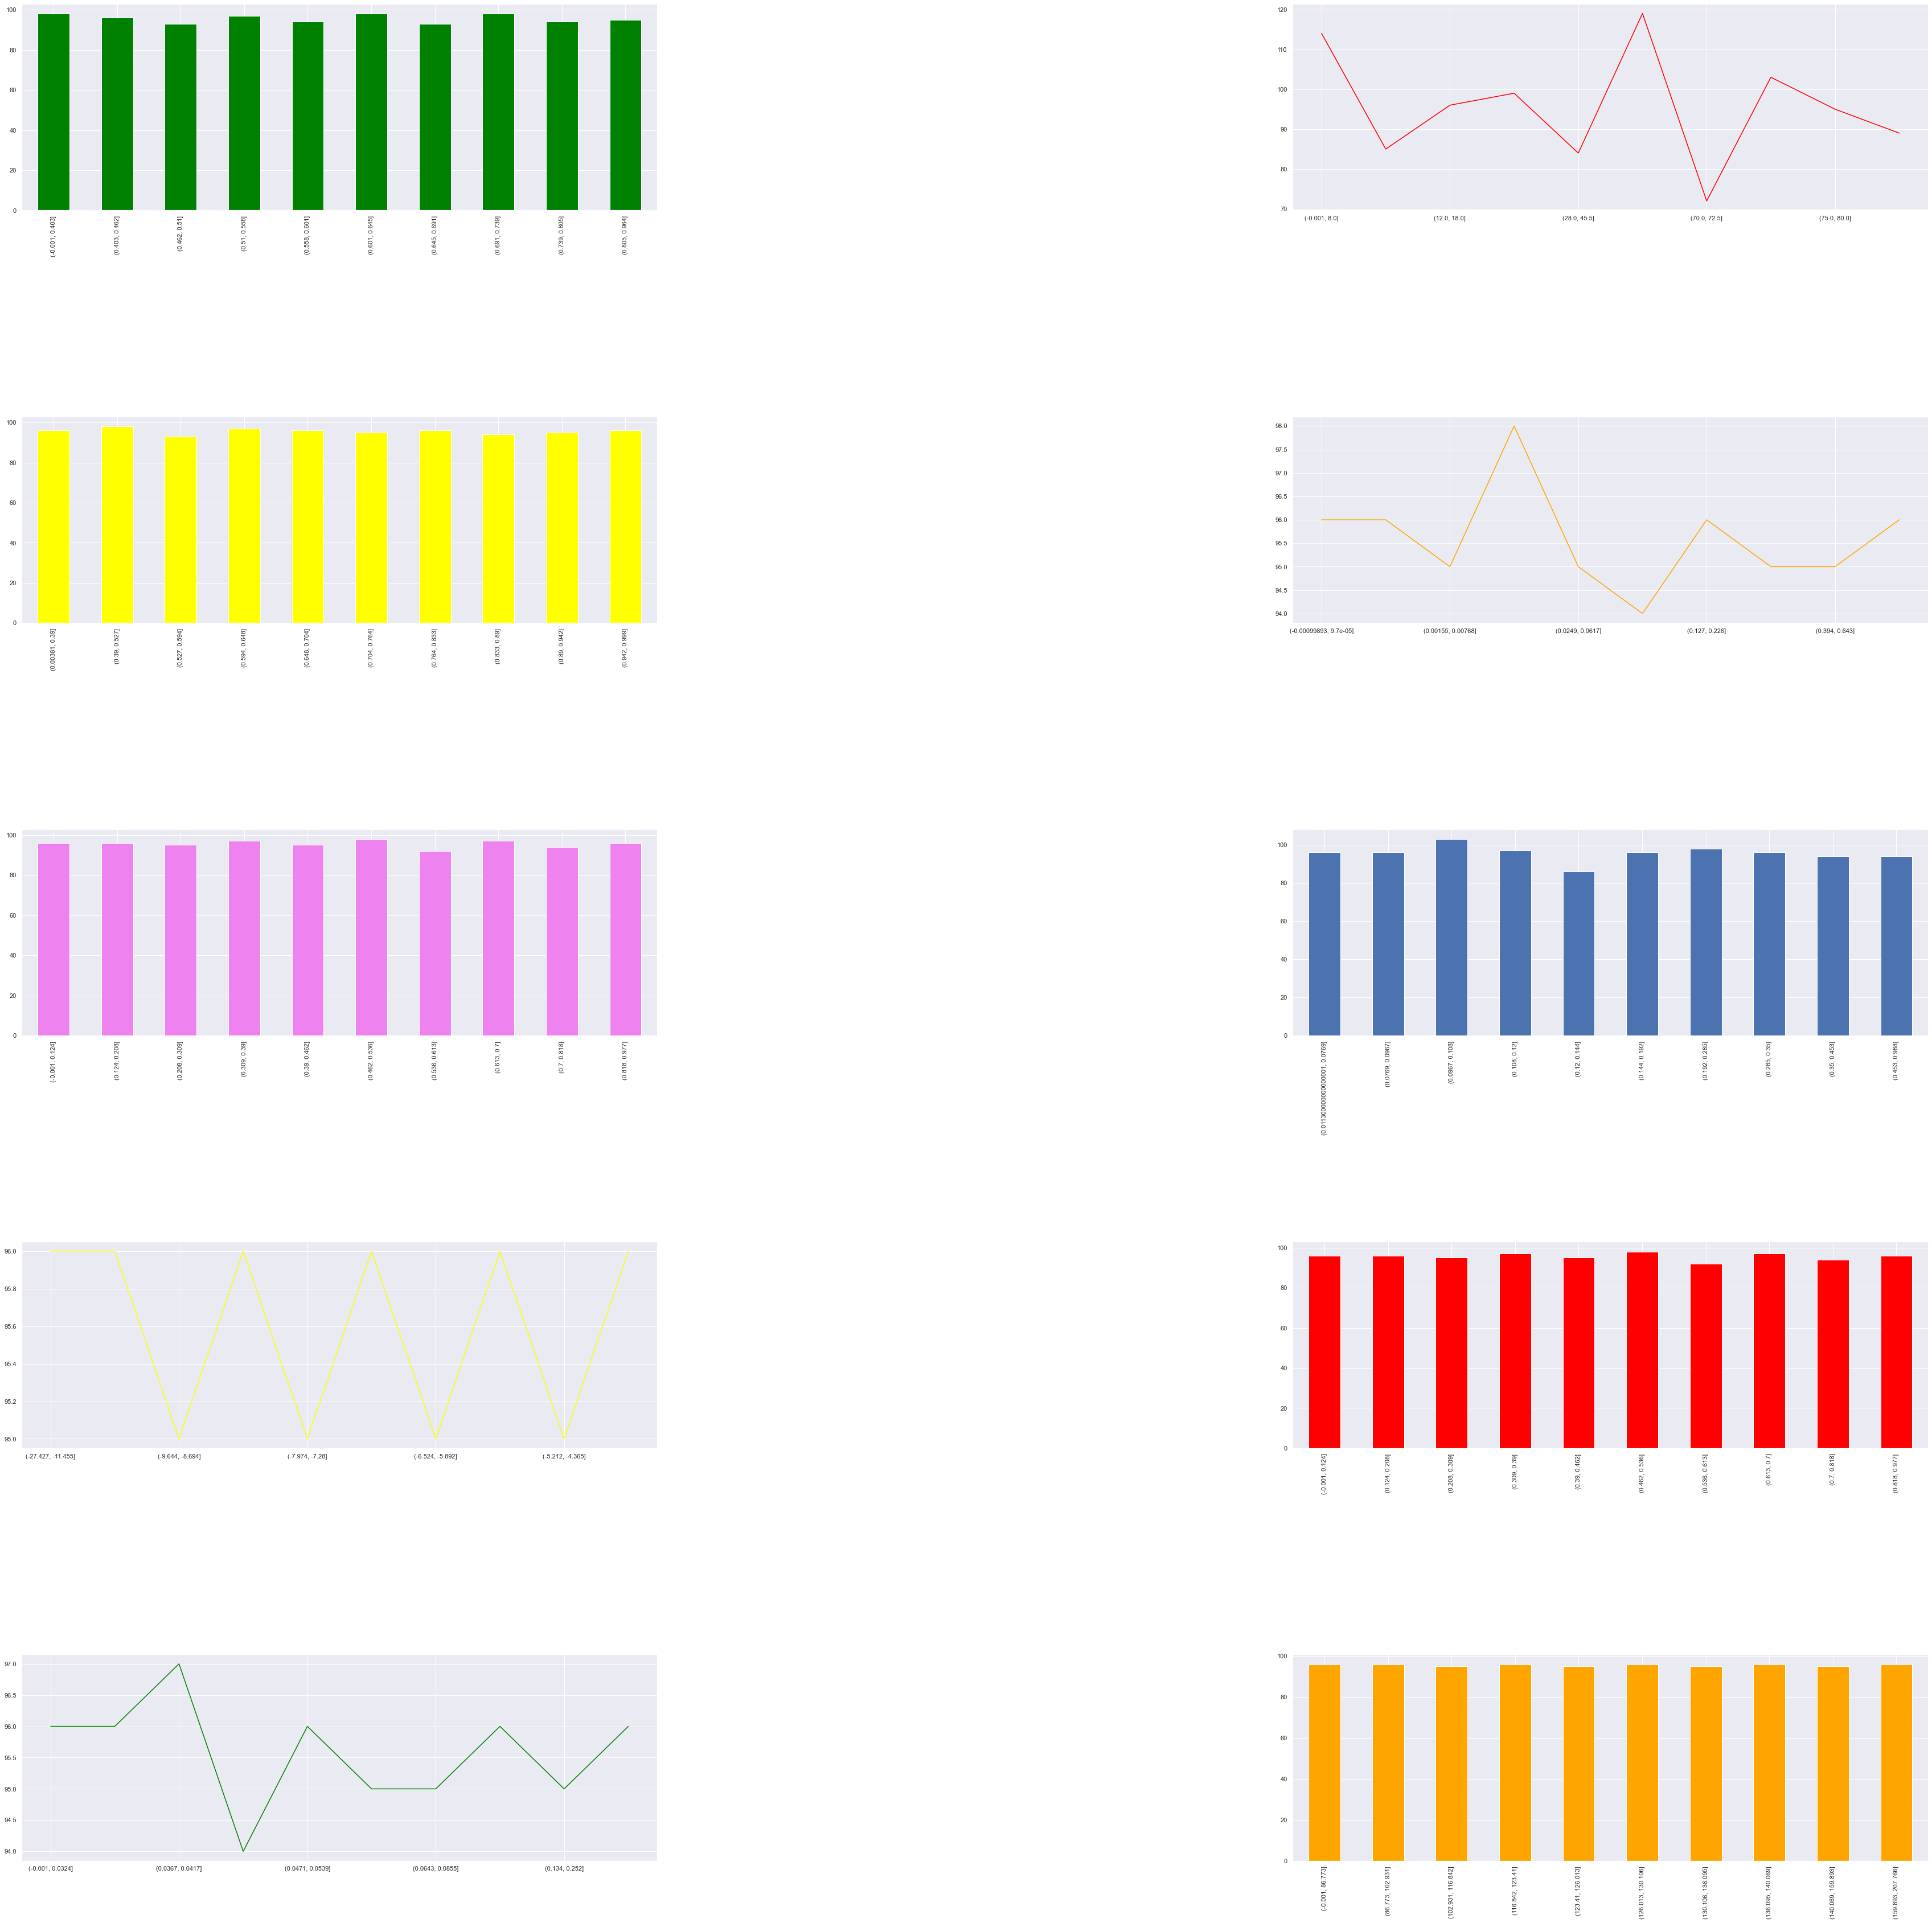

In [132]:
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.subplots_adjust(hspace=1, wspace = 1)

pd.qcut(df['danceability'], 10).value_counts().sort_index().plot(kind='bar',figsize=(60,60),ax=axes[0,0],color='green')
pd.qcut(df['popularity'], 10).value_counts().sort_index().plot(kind='line',figsize=(60,60),ax=axes[0,1],color='red')
pd.qcut(df['energy'], 10).value_counts().sort_index().plot(kind='bar',figsize=(60,60),ax=axes[1,0],color='yellow')
pd.qcut(df['acousticness'], 10).value_counts().sort_index().plot(kind='line',figsize=(60,60),ax=axes[1,1],color='orange')
pd.qcut(df['valence'], 10).value_counts().sort_index().plot(kind='bar',figsize=(60,60),ax=axes[2,0],color='violet')
pd.qcut(df['liveness'], 10).value_counts().sort_index().plot(kind='bar',figsize=(60,60),ax=axes[2,1])
pd.qcut(df['loudness'], 10).value_counts().sort_index().plot(kind='line',figsize=(60,60),ax=axes[3,0],color='yellow')
pd.qcut(df['valence'],10).value_counts().sort_index().plot(kind='bar',figsize=(60,60),ax=axes[3,1],color='red')
pd.qcut(df['speechiness'], 10).value_counts().sort_index().plot(kind='line',figsize=(60,60),ax=axes[4,0],color='green')
pd.qcut(df['tempo'], 10).value_counts().sort_index().plot(kind='bar',figsize=(60,60),ax=axes[4,1],color='orange')

In [133]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist_name"] + " - " + df["track_name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=(20,20),
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [134]:
chosen = ["danceability", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist_name"] + " - " + df["track_name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["energy"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=(20,20),
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [135]:
chosen = ["danceability", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness","energy"]
text1 = df["artist_name"] + " - " + df["track_name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["popularity"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=(20,20),
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [136]:
chosen = ["danceability", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness","energy"]
text1 = df["artist_name"] + " - " + df["track_name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["liveness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=(20,20),
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [137]:


df.head()

,artist_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Olivia Rodrigo,good 4 u,90,0.563,0.664,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147
1,LYMEY,END OF YEAR 2021,37,0.429,0.829,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.278,127.083,1472769
2,Doja Cat,Woman,90,0.824,0.764,-4.175,0,0.0854,0.08880,0.002940,0.1170,0.881,107.998,172627
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,60,0.645,0.809,-6.120,1,0.0385,0.00921,0.001080,0.1060,0.966,138.978,196680
4,Drake,Knife Talk (with 21 Savage ft. Project Pat),84,0.849,0.424,-9.579,0,0.3240,0.06350,0.000000,0.0834,0.153,145.887,242966


In [138]:
corr=df.corr()
corr

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
popularity,1.000000,0.356712,-0.272802,0.329455,0.151459,0.262832,0.163266,-0.506074,-0.259711,0.182033,-0.053077,-0.092548
danceability,0.356712,1.000000,-0.125417,0.244932,-0.040305,0.275814,-0.043672,-0.258804,-0.248955,0.318616,-0.150467,0.024649
energy,-0.272802,-0.125417,1.000000,0.490334,-0.115116,-0.096720,-0.676193,0.215861,0.268859,0.123380,0.153732,-0.146712
loudness,0.329455,0.244932,0.490334,1.000000,0.067679,0.084705,-0.390151,-0.388505,-0.055116,0.271974,0.076753,-0.008177
mode,0.151459,-0.040305,-0.115116,0.067679,1.000000,-0.043403,0.099583,-0.114054,-0.031710,0.065386,-0.024592,-0.049028
speechiness,0.262832,0.275814,-0.096720,0.084705,-0.043403,1.000000,-0.002289,-0.209594,-0.030144,0.062824,0.046376,-0.048946
acousticness,0.163266,-0.043672,-0.676193,-0.390151,0.099583,-0.002289,1.000000,-0.072066,-0.139404,-0.001595,-0.119867,0.061763
instrumentalness,-0.506074,-0.258804,0.215861,-0.388505,-0.114054,-0.209594,-0.072066,1.000000,0.128825,-0.238785,0.019624,-0.125746
liveness,-0.259711,-0.248955,0.268859,-0.055116,-0.031710,-0.030144,-0.139404,0.128825,1.000000,-0.058220,0.028472,-0.024182
valence,0.182033,0.318616,0.123380,0.271974,0.065386,0.062824,-0.001595,-0.238785,-0.058220,1.000000,0.025222,-0.146443


<AxesSubplot:>

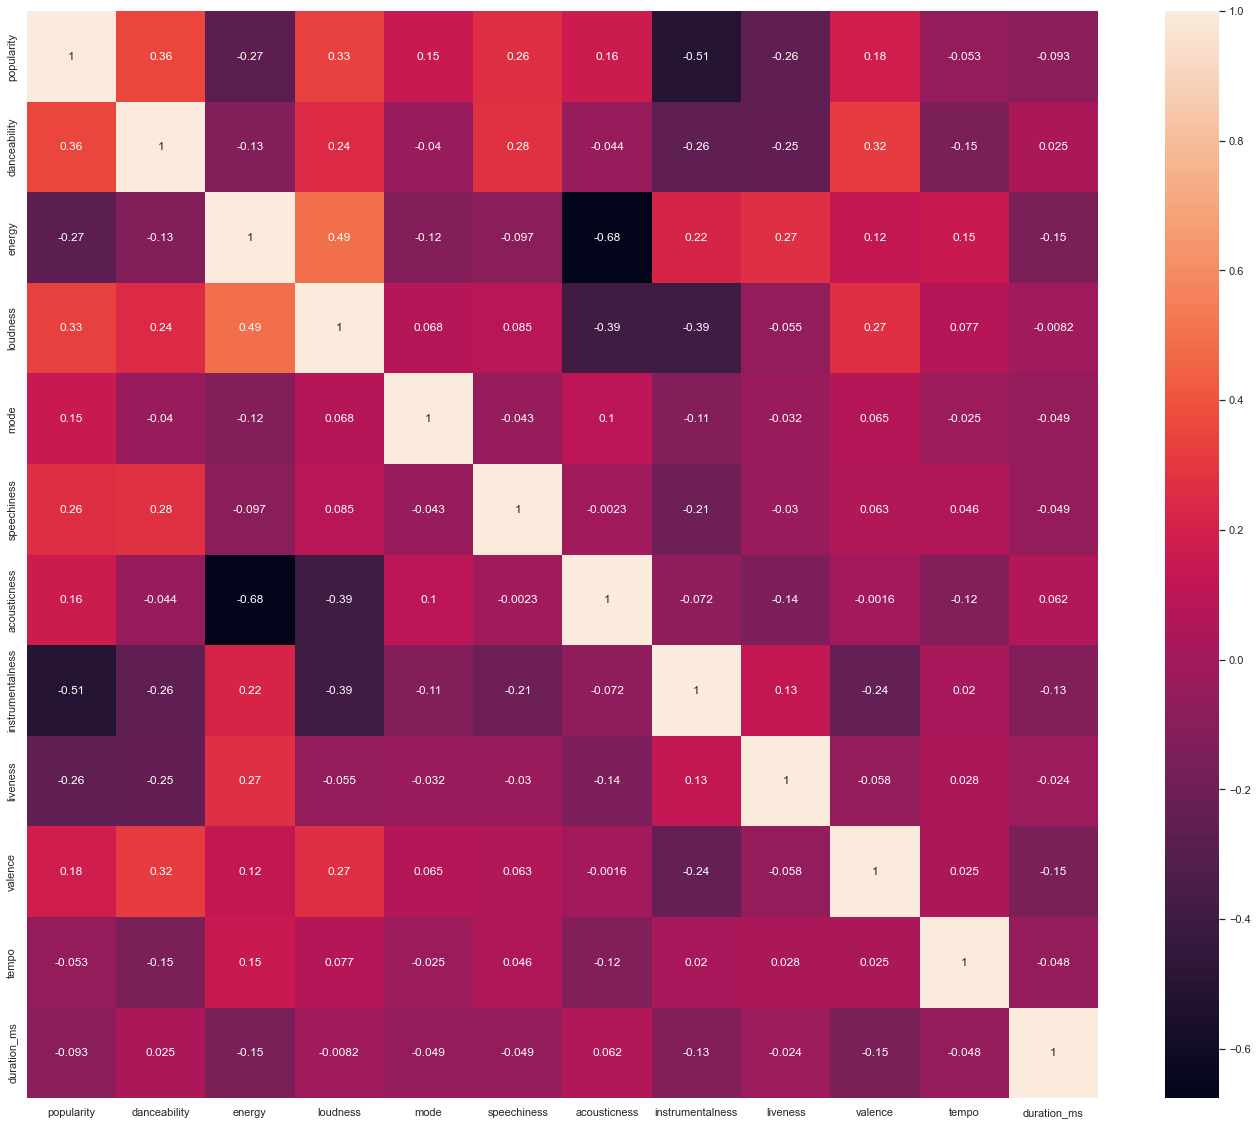

In [139]:
plt.figure(figsize=(24,20))
sns.set(style='whitegrid')
sns.heatmap(corr,annot=True)

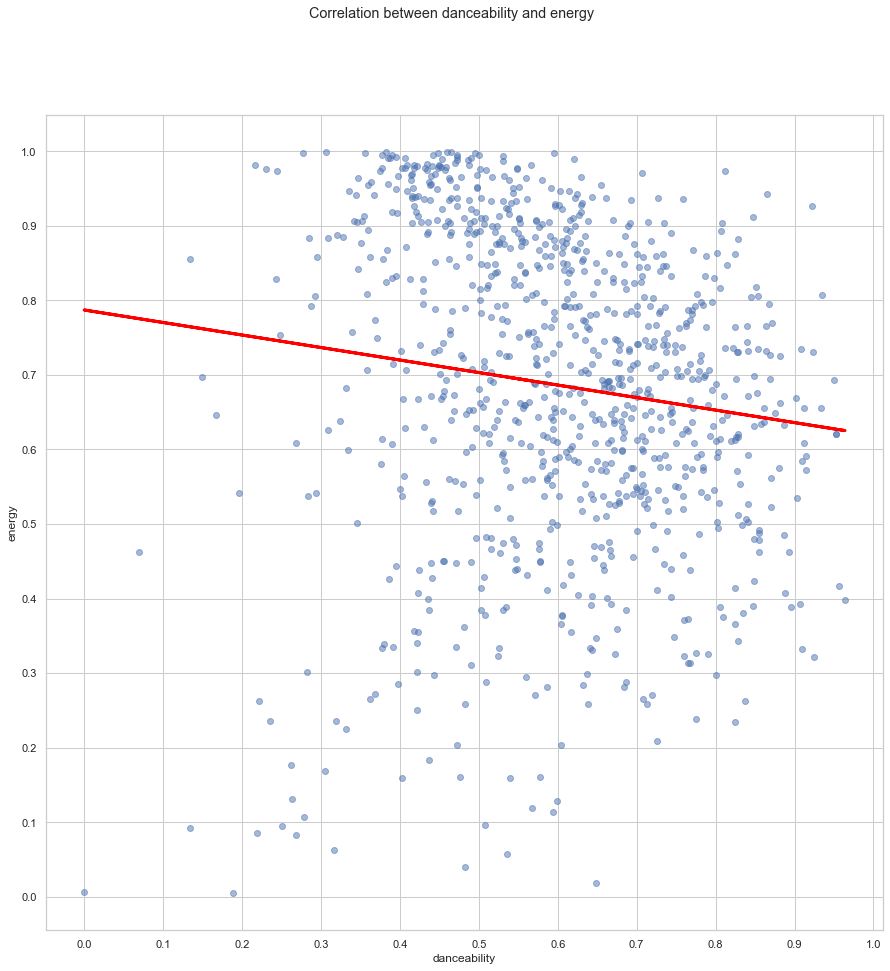

In [140]:
x = df["danceability"].values
y = df["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(15,15))
fig.suptitle("Correlation between danceability and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("energy")

plt.show()

In [141]:
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness",
            "mode", "speechiness", "loudness", "tempo", "valence"]

In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [143]:
def preprocess(df):
    df = df.copy()
    ## drop same songs from the same artist
    df = df.drop_duplicates(subset =['track_name','artist_name'])

    #split into target variable y and dependent variables x
    Y = df.popularity
    X = df.drop(['track_name','artist_name'], axis=1)

    #train test split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=42)

    #scaling the dependent variables X
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = pd.DataFrame(scaler.transform(Xtrain),index=Xtrain.index,columns=Xtrain.columns)
    Xtest = pd.DataFrame(scaler.transform(Xtest),index=Xtest.index,columns=Xtest.columns)

    return Xtrain, Xtest, Ytrain, Ytest

In [144]:
Xtrain, Xtest, Ytrain, Ytest = preprocess(df)
display(Xtrain, Ytrain, Xtest)

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
228,1.031583,-0.829300,-2.342285,-1.520119,0.807373,0.030666,2.980283,-0.584690,-0.531112,-0.202378,1.697117,-0.246630
318,0.797209,1.196788,-0.139599,0.624920,-1.238584,1.528230,0.840311,-0.584690,-0.653578,0.742572,0.741649,-0.250645
697,-1.211704,-0.222113,-2.747156,-2.684304,-1.238584,-0.497584,3.126370,1.701941,-0.631311,-1.005383,0.517699,-0.436827
212,1.031583,1.772018,-0.549289,0.497144,0.807373,0.656360,0.903483,-0.584690,-0.625745,0.819627,-0.171477,0.391128
79,1.098546,0.442598,0.135135,0.069679,0.807373,1.302569,-0.328383,-0.584690,0.983017,0.016623,1.277178,-0.090192
...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.441621,-0.835692,1.147310,-0.102232,-1.238584,-0.549896,-0.734960,2.142913,-0.497712,-0.372713,0.075346,-0.921780
270,0.830691,-0.937955,-0.048021,0.894979,0.807373,-0.683241,-0.040158,-0.584690,-0.659145,0.057179,2.278162,0.204647
860,0.864173,1.017828,-0.298655,0.172765,-1.238584,-0.444246,-0.083589,-0.584680,0.376252,0.807461,-0.358287,-0.129057
435,0.830691,2.219420,0.019457,1.320283,0.807373,-0.094473,-0.682544,-0.584690,-0.269479,1.711855,0.210595,-0.050554


228    78
318    71
697    11
212    78
79     80
       ..
106    34
270    72
860    73
435    72
102    36
Name: popularity, Length: 669, dtype: int64

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
342,-0.742958,-1.104132,1.190689,0.113506,-1.238584,-0.666829,-0.735000,-0.580280,-0.442045,0.973739,0.490236,-0.789974
864,0.629800,-0.011195,-0.067300,0.414738,0.807373,-0.606311,2.020849,-0.584690,-0.536678,-0.092878,0.283766,0.164003
522,-1.111258,-0.196547,0.159234,-0.894508,-1.238584,-0.641186,-0.508819,2.201320,-0.688648,-1.293329,-0.402350,0.878382
544,-0.977331,-1.327833,1.253348,-0.534326,-1.238584,-0.609389,-0.734750,2.075746,-0.096913,-1.260884,0.515136,-0.150465
682,0.663282,0.845259,-1.171054,-0.780929,0.807373,0.102467,-0.707023,-0.584633,-0.269479,-1.410941,1.009815,0.084131
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.730246,-0.707863,0.091756,0.945287,0.807373,-0.672984,-0.350098,-0.584690,-0.564511,0.925073,1.433388,0.120872
760,0.663282,-0.567251,0.019457,0.393133,0.807373,-0.473992,-0.355626,-0.584690,-0.837277,-0.036100,1.205804,-0.125657
551,-1.245186,0.410640,-0.370953,-0.817348,-1.238584,-0.599131,-0.734590,-0.508469,-0.808331,-0.461935,0.515251,0.983639
404,0.763727,0.998653,-0.727625,-0.171059,-1.238584,2.923221,-0.138865,-0.584690,-0.531112,1.468520,0.857506,-0.051905


In [145]:
pd.cut(df['popularity'],bins=3)

0       (60.0, 90.0]
1       (30.0, 60.0]
2       (60.0, 90.0]
3       (30.0, 60.0]
4       (60.0, 90.0]
           ...      
951    (-0.09, 30.0]
952    (-0.09, 30.0]
953     (60.0, 90.0]
954    (-0.09, 30.0]
955    (-0.09, 30.0]
Name: popularity, Length: 956, dtype: category
Categories (3, interval[float64, right]): [(-0.09, 30.0] < (30.0, 60.0] < (60.0, 90.0]]

In [146]:
pd.cut(df['popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts()


high      474
low       419
medium     63
Name: popularity, dtype: int64

In [147]:
df['popularity'] = pd.cut(df.popularity, bins=3, labels = ["low", "medium", "high"], right = True)

In [148]:
df.head(10)

,artist_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Olivia Rodrigo,good 4 u,high,0.563,0.664,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147
1,LYMEY,END OF YEAR 2021,medium,0.429,0.829,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.278,127.083,1472769
2,Doja Cat,Woman,high,0.824,0.764,-4.175,0,0.0854,0.08880,0.002940,0.1170,0.881,107.998,172627
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,medium,0.645,0.809,-6.120,1,0.0385,0.00921,0.001080,0.1060,0.966,138.978,196680
4,Drake,Knife Talk (with 21 Savage ft. Project Pat),high,0.849,0.424,-9.579,0,0.3240,0.06350,0.000000,0.0834,0.153,145.887,242966
5,Jay Sean,2012 (It Ain't The End),medium,0.717,0.792,-2.703,1,0.0393,0.19900,0.000000,0.4230,0.513,126.975,222200
6,Morgan Wallen,Wasted On You,high,0.505,0.657,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,178520
7,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,low,0.887,0.633,-10.453,1,0.0660,0.06290,0.922000,0.0637,0.849,130.023,176363
8,Lil Nas X,THATS WHAT I WANT,high,0.737,0.846,-4.510,0,0.2200,0.00614,0.000000,0.0486,0.546,87.981,143901
9,Years & Years,Starstruck,low,0.555,0.879,-2.484,0,0.0983,0.01100,0.000000,0.2980,0.691,113.852,207755


In [149]:
df.loc[df['popularity']=='high']

,artist_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Olivia Rodrigo,good 4 u,high,0.563,0.664,-5.044,1,0.1540,0.33500,0.00000,0.0849,0.688,166.928,178147
2,Doja Cat,Woman,high,0.824,0.764,-4.175,0,0.0854,0.08880,0.00294,0.1170,0.881,107.998,172627
4,Drake,Knife Talk (with 21 Savage ft. Project Pat),high,0.849,0.424,-9.579,0,0.3240,0.06350,0.00000,0.0834,0.153,145.887,242966
6,Morgan Wallen,Wasted On You,high,0.505,0.657,-5.240,0,0.0318,0.37300,0.00107,0.1260,0.252,196.000,178520
8,Lil Nas X,THATS WHAT I WANT,high,0.737,0.846,-4.510,0,0.2200,0.00614,0.00000,0.0486,0.546,87.981,143901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Juice WRLD,734,high,0.635,0.554,-3.975,0,0.0343,0.13400,0.00000,0.1160,0.315,156.822,196147
946,J Balvin,Una Nota,high,0.662,0.788,-4.550,0,0.2050,0.01910,0.00000,0.0559,0.711,179.876,170760
948,Surfaces,Sheesh!,high,0.743,0.832,-3.937,1,0.0611,0.16100,0.00000,0.0925,0.801,149.951,148847
950,Drake,Lemon Pepper Freestyle (feat. Rick Ross),high,0.770,0.637,-5.530,1,0.3450,0.10300,0.00000,0.1710,0.431,94.966,383037


In [150]:
df.loc[df['popularity']=='medium']

,artist_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1,LYMEY,END OF YEAR 2021,medium,0.429,0.829,-5.071,0,0.0604,0.023800,0.000174,0.6730,0.278,127.083,1472769
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,medium,0.645,0.809,-6.120,1,0.0385,0.009210,0.001080,0.1060,0.966,138.978,196680
5,Jay Sean,2012 (It Ain't The End),medium,0.717,0.792,-2.703,1,0.0393,0.199000,0.000000,0.4230,0.513,126.975,222200
20,Elvis Costello & The Attractions,"Radio, Radio - 2021 Remaster",medium,0.596,0.872,-4.925,1,0.0796,0.135000,0.000003,0.2780,0.899,146.734,186213
24,Lofi Fruits Music,7 Years,medium,0.604,0.204,-17.793,0,0.0299,0.751000,0.867000,0.0976,0.122,114.002,114000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Dim3nsion,Shoganai (Mixed),medium,0.440,0.967,-8.582,0,0.0478,0.000013,0.714000,0.2690,0.757,133.978,57307
418,Alesso,Years,medium,0.362,0.858,-3.920,1,0.0743,0.002110,0.000001,0.2500,0.282,127.891,196347
450,DJ Fleg,Cali,medium,0.854,0.735,-8.874,0,0.1900,0.002420,0.683000,0.3290,0.933,117.933,147000
510,Heavy-K,As'buyeli,medium,0.785,0.697,-8.561,0,0.0469,0.060500,0.003440,0.0742,0.452,121.043,426818


In [151]:
df.loc[df['popularity']=='low']

,artist_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
7,Dj Biffen,Merry Christmas and Happy New Year 2021 - Radi...,low,0.887,0.633,-10.453,1,0.0660,0.06290,0.92200,0.0637,0.849,130.023,176363
9,Years & Years,Starstruck,low,0.555,0.879,-2.484,0,0.0983,0.01100,0.00000,0.2980,0.691,113.852,207755
11,Hop hip show,YEAR 2021,low,0.690,0.735,-7.542,1,0.3630,0.13100,0.00000,0.3570,0.319,120.013,204292
13,Amaranta,Medley Picaflor de Los Andes - Live Streaming ...,low,0.459,0.693,-10.440,1,0.2540,0.23800,0.00000,0.9310,0.530,136.397,1035421
16,yt music,Year 2021,low,0.848,0.390,-11.553,0,0.1070,0.12700,0.39700,0.1050,0.577,144.986,245101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,Dezza,My Breath (RES006),low,0.640,0.761,-7.062,1,0.0306,0.00640,0.01960,0.4240,0.373,124.333,200998
951,Ferry Corsten,I Don't Need You (RES006),low,0.619,0.809,-7.013,0,0.0319,0.00186,0.00315,0.1020,0.159,124.015,186232
952,Fast Distance,Summer Breeze (RES006),low,0.697,0.823,-7.149,1,0.0402,0.04120,0.31100,0.1470,0.435,126.007,182863
954,Ferry Corsten,Poison (RES006),low,0.531,0.933,-8.284,1,0.0361,0.00157,0.49300,0.1970,0.042,125.000,328560


In [152]:
y = df.popularity
y.value_counts()/y.count()

high      0.495816
low       0.438285
medium    0.065900
Name: popularity, dtype: float64

In [153]:
import numpy as np
import pandas as pd
pop_count = df.popularity.value_counts()

In [154]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Removed indexes:')

print(X_ros.shape, y_ros.shape)

Removed indexes:
(1422, 3) (1422,)


In [155]:
y_ros.value_counts()

low       474
medium    474
high      474
Name: popularity, dtype: int64

In [156]:
print(X_ros.shape)
print(y_ros.shape)

(1422, 3)
(1422,)


In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.3)

In [158]:
models = {
    "                     Linear Regression": LogisticRegression(),
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [159]:
for name, model in models.items():
    print (name + ": {:.5f}".format(model.score(X_test,y_test)))

                     Linear Regression: 0.56674
                   Logistic Regression: 0.56674
                   K-Nearest Neighbors: 0.73770
                         Decision Tree: 0.82904
Support Vector Machine (Linear Kernel): 0.55269
   Support Vector Machine (RBF Kernel): 0.62529
                        Neural Network: 0.64871
                         Random Forest: 0.88056
                     Gradient Boosting: 0.81499


LOGISTIC REGRESSION

In [160]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.5667447306791569

In [161]:
X_test

array([[ 0.31992715, -0.19703051, -0.27092882],
       [-0.25998999, -0.34423515,  0.13622665],
       [ 0.42655237, -0.28659477,  0.14337565],
       ...,
       [-0.19774403, -0.23007893, -0.04797617],
       [ 0.81623064, -0.06229369,  0.02526149],
       [ 0.81623064, -0.06229369,  0.02526149]])

In [162]:
Y_pred=lr.predict(X_test)
Y_pred

array(['low', 'high', 'medium', 'high', 'medium', 'low', 'medium',
       'medium', 'low', 'low', 'medium', 'high', 'high', 'high', 'high',
       'medium', 'medium', 'high', 'medium', 'high', 'high', 'low',
       'high', 'high', 'high', 'medium', 'high', 'medium', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'medium', 'high',
       'high', 'high', 'high', 'low', 'medium', 'low', 'high', 'low',
       'high', 'medium', 'low', 'high', 'high', 'medium', 'high', 'high',
       'low', 'high', 'high', 'medium', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'high', 'medium', 'medium',
       'high', 'medium', 'low', 'medium', 'high', 'medium', 'medium',
       'high', 'high', 'medium', 'medium', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'medium',
       'medium', 'medium', 'high', 'high', 'medium', 'medium', 'medium',
       'high', 'medium', 'high', 'high', 'medium', 'low', 'high', 'high'

In [163]:
lr.predict_proba(X_train)

array([[0.1325076 , 0.41229158, 0.45520082],
       [0.30773332, 0.38007963, 0.31218704],
       [0.01065739, 0.38892731, 0.6004153 ],
       ...,
       [0.00819066, 0.44090016, 0.55090918],
       [0.27738619, 0.34521292, 0.37740089],
       [0.01722715, 0.57037303, 0.41239982]])

In [164]:
lr.predict(X_train)

array(['medium', 'low', 'medium', 'high', 'low', 'medium', 'medium',
       'medium', 'low', 'medium', 'low', 'low', 'high', 'high', 'medium',
       'low', 'high', 'high', 'high', 'high', 'low', 'high', 'medium',
       'medium', 'medium', 'high', 'high', 'high', 'medium', 'medium',
       'low', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'medium', 'high', 'medium', 'high', 'high', 'high',
       'medium', 'high', 'low', 'high', 'low', 'medium', 'high', 'medium',
       'high', 'high', 'high', 'medium', 'medium', 'high', 'low', 'high',
       'high', 'low', 'high', 'low', 'high', 'medium', 'high', 'high',
       'low', 'high', 'high', 'low', 'medium', 'medium', 'high', 'high',
       'low', 'high', 'medium', 'high', 'high', 'low', 'high', 'medium',
       'high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high',
       'medium', 'high', 'high', 'low', 'high', 'high', 'high', 'high',
       'medium', 'medium', 'high', 'medium', 'low', 'me

In [165]:
print(lr.intercept_)
print(lr.coef_)
zip(features, lr.coef_)

[-0.2791249   0.11882809  0.16029682]
[[-3.8175351   0.61116476 -0.47186057]
 [ 1.93019343 -0.13925887 -0.32904338]
 [ 1.88734167 -0.47190589  0.80090394]]


In [166]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [167]:
cmat = confusion_matrix(y_test,Y_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 137
FP - Flase Positive 8
FN - False Negative 39
TP - True Positive 47
Accuracy Score: 0.5667447306791569
Misclassification Rate: 0.4332552693208431


In [168]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

        high       0.66      0.94      0.77       146
         low       0.49      0.31      0.38       150
      medium       0.47      0.44      0.46       131

    accuracy                           0.57       427
   macro avg       0.54      0.56      0.54       427
weighted avg       0.54      0.57      0.54       427



K-NEAREST NEIGHBOUR

In [169]:
knn = KNeighborsClassifier()


In [170]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [171]:
y_pred = knn.predict(X_test)

In [172]:
print(metrics.accuracy_score(y_test, y_pred))

0.7377049180327869


In [173]:
y_pred

array(['low', 'medium', 'medium', 'high', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium',
       'high', 'medium', 'low', 'low', 'low', 'low', 'high', 'medium',
       'high', 'high', 'medium', 'low', 'high', 'medium', 'medium', 'low',
       'high', 'medium', 'medium', 'medium', 'medium', 'low', 'high',
       'medium', 'high', 'high', 'medium', 'medium', 'medium', 'high',
       'low', 'high', 'medium', 'low', 'high', 'medium', 'low', 'high',
       'medium', 'medium', 'high', 'low', 'medium', 'medium', 'high',
       'medium', 'medium', 'high', 'high', 'high', 'low', 'medium', 'low',
       'low', 'low', 'high', 'medium', 'low', 'low', 'high', 'medium',
       'medium', 'high', 'high', 'low', 'medium', 'medium', 'high',
       'high', 'high', 'medium', 'medium', 'high', 'high', 'low', 'low',
       'medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'medium', 'medium', 'high', 'low', 'high', 'high', 'low', 'low',

In [174]:
knn.predict_proba(X_train)

array([[0. , 0.6, 0.4],
       [0.4, 0.6, 0. ],
       [0. , 0. , 1. ],
       ...,
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8]])

In [175]:
knn.predict(X_train)

array(['low', 'low', 'medium', 'medium', 'medium', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'high',
       'medium', 'medium', 'high', 'high', 'high', 'high', 'medium',
       'high', 'low', 'medium', 'medium', 'high', 'high', 'high',
       'medium', 'low', 'medium', 'low', 'low', 'medium', 'low', 'low',
       'medium', 'medium', 'medium', 'high', 'low', 'low', 'high', 'low',
       'medium', 'medium', 'medium', 'medium', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'high', 'high', 'high', 'medium',
       'medium', 'high', 'medium', 'high', 'medium', 'low', 'high', 'low',
       'high', 'medium', 'low', 'medium', 'medium', 'high', 'high',
       'medium', 'low', 'medium', 'high', 'medium', 'low', 'high', 'low',
       'high', 'high', 'medium', 'high', 'medium', 'medium', 'high',
       'high', 'high', 'high', 'high', 'medium', 'high', 'medium', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'medium', 'low',
       'hig

In [176]:
cmat = confusion_matrix(y_test,y_pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 119
FP - Flase Positive 12
FN - False Negative 30
TP - True Positive 76
Accuracy Score: 0.7377049180327869
Misclassification Rate: 0.26229508196721313


In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.79      0.82      0.80       146
         low       0.78      0.51      0.62       150
      medium       0.67      0.92      0.77       131

    accuracy                           0.74       427
   macro avg       0.75      0.75      0.73       427
weighted avg       0.75      0.74      0.73       427



DECISION TREE

In [178]:
clf_entropy = DecisionTreeClassifier()

In [179]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred_decision = clf_entropy.predict(X_test)

In [181]:
y_pred_decision

array(['low', 'medium', 'medium', 'low', 'medium', 'low', 'medium',
       'medium', 'low', 'medium', 'medium', 'high', 'high', 'high', 'low',
       'medium', 'low', 'low', 'low', 'low', 'high', 'medium', 'high',
       'low', 'high', 'low', 'high', 'low', 'medium', 'low', 'high',
       'medium', 'medium', 'medium', 'medium', 'low', 'low', 'medium',
       'high', 'high', 'medium', 'medium', 'medium', 'high', 'low',
       'high', 'medium', 'high', 'low', 'low', 'medium', 'high', 'medium',
       'medium', 'high', 'low', 'low', 'medium', 'high', 'high', 'medium',
       'high', 'high', 'high', 'low', 'medium', 'low', 'low', 'low',
       'low', 'medium', 'low', 'low', 'low', 'medium', 'low', 'high',
       'high', 'low', 'medium', 'medium', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'medium', 'low', 'low',
       'low', 'medium', 'high', 'high', 'medium', 'low', 'medium', 'low',
       'high', 'high', 'low', 'low', 'high', 'low', 'high', 'high',
    

In [182]:
clf_entropy.predict_proba(X_train)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [183]:
clf_entropy.predict(X_train)

array(['low', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'medium',
       'high', 'low', 'low', 'medium', 'medium', 'low', 'low', 'medium',
       'high', 'high', 'high', 'high', 'medium', 'high', 'low', 'medium',
       'low', 'high', 'high', 'high', 'medium', 'low', 'medium', 'low',
       'low', 'medium', 'high', 'low', 'medium', 'medium', 'medium',
       'high', 'low', 'low', 'high', 'low', 'high', 'medium', 'medium',
       'medium', 'high', 'high', 'high', 'low', 'low', 'high', 'low',
       'high', 'high', 'low', 'low', 'medium', 'low', 'medium', 'high',
       'medium', 'low', 'high', 'low', 'high', 'medium', 'low', 'medium',
       'medium', 'high', 'high', 'medium', 'low', 'medium', 'high', 'low',
       'high', 'high', 'low', 'high', 'high', 'medium', 'high', 'medium',
       'medium', 'high', 'high', 'low', 'high', 'low', 'medium', 'high',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'high',
       'medium', 'low', 'high', 'low', 'low', 'medium', 'low

In [184]:
cmat = confusion_matrix(y_test,y_pred_decision)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 118
FP - Flase Positive 24
FN - False Negative 29
TP - True Positive 110
Accuracy Score: 0.8337236533957846
Misclassification Rate: 0.16627634660421545


In [185]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

        high       0.80      0.81      0.81       146
         low       0.80      0.73      0.77       150
      medium       0.90      0.98      0.93       131

    accuracy                           0.83       427
   macro avg       0.83      0.84      0.84       427
weighted avg       0.83      0.83      0.83       427



In [186]:
clf = LinearSVC()

In [187]:
clf.fit(X_train,y_train)

LinearSVC()

In [188]:
y_pred_svm = clf.predict(X_test)

In [189]:
y_pred_svm

array(['low', 'high', 'medium', 'high', 'medium', 'low', 'medium',
       'medium', 'low', 'low', 'medium', 'high', 'high', 'high', 'high',
       'medium', 'medium', 'high', 'medium', 'high', 'high', 'low',
       'high', 'high', 'high', 'medium', 'high', 'medium', 'high',
       'medium', 'high', 'high', 'medium', 'low', 'low', 'medium', 'high',
       'high', 'high', 'high', 'low', 'medium', 'low', 'high', 'low',
       'high', 'medium', 'high', 'high', 'high', 'medium', 'high', 'high',
       'low', 'high', 'high', 'medium', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'high', 'medium', 'medium',
       'high', 'medium', 'medium', 'medium', 'high', 'medium', 'medium',
       'high', 'high', 'medium', 'medium', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'medium',
       'high', 'high', 'high', 'high', 'medium', 'medium', 'medium',
       'high', 'medium', 'high', 'high', 'medium', 'low', 'high', 'high

In [190]:

clf.predict(X_train)

array(['medium', 'low', 'medium', 'high', 'low', 'medium', 'medium',
       'medium', 'low', 'medium', 'low', 'low', 'high', 'high', 'medium',
       'low', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'medium', 'medium', 'high', 'high', 'high', 'medium', 'medium',
       'low', 'medium', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'medium', 'high', 'high', 'high', 'high',
       'high', 'medium', 'high', 'low', 'high', 'low', 'high', 'high',
       'medium', 'high', 'high', 'high', 'medium', 'medium', 'high',
       'low', 'high', 'high', 'low', 'high', 'low', 'high', 'medium',
       'high', 'high', 'low', 'high', 'high', 'low', 'medium', 'medium',
       'high', 'high', 'medium', 'high', 'medium', 'high', 'high', 'low',
       'high', 'medium', 'high', 'high', 'high', 'high', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'medium', 'medium', 'high', 'medium', 'low',
   

In [191]:
cmat = confusion_matrix(y_test,y_pred_svm)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 137
FP - Flase Positive 7
FN - False Negative 47
TP - True Positive 38
Accuracy Score: 0.5526932084309133
Misclassification Rate: 0.44730679156908665


In [192]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

        high       0.63      0.94      0.76       146
         low       0.46      0.25      0.33       150
      medium       0.48      0.47      0.47       131

    accuracy                           0.55       427
   macro avg       0.52      0.55      0.52       427
weighted avg       0.52      0.55      0.52       427



In [193]:
clf_svm = SVC()

In [194]:
clf_svm.fit(X_train,y_train)

SVC()

In [195]:
y_pred_RBF = clf_svm.predict(X_test)

In [196]:
y_pred_RBF

array(['low', 'high', 'medium', 'high', 'medium', 'low', 'medium',
       'medium', 'medium', 'medium', 'low', 'high', 'high', 'high',
       'high', 'medium', 'low', 'high', 'low', 'high', 'high', 'medium',
       'high', 'high', 'high', 'low', 'high', 'medium', 'high', 'low',
       'high', 'high', 'low', 'medium', 'medium', 'medium', 'high',
       'high', 'high', 'high', 'low', 'medium', 'medium', 'high', 'low',
       'high', 'low', 'medium', 'high', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'medium', 'high', 'high', 'high',
       'medium', 'high', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'medium', 'medium', 'medium',
       'high', 'high', 'low', 'medium', 'high', 'high', 'high', 'high',
       'medium', 'high', 'high', 'high', 'medium', 'medium', 'high',
       'medium', 'medium', 'medium', 'high', 'high', 'low', 'medium',
       'medium', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high',

In [197]:
clf_svm.predict(X_train)

array(['low', 'low', 'medium', 'high', 'medium', 'medium', 'medium',
       'medium', 'low', 'low', 'medium', 'low', 'high', 'high', 'low',
       'medium', 'high', 'high', 'high', 'high', 'medium', 'high',
       'medium', 'medium', 'medium', 'high', 'high', 'high', 'medium',
       'low', 'low', 'low', 'low', 'high', 'high', 'medium', 'high',
       'high', 'high', 'high', 'low', 'medium', 'high', 'low', 'high',
       'high', 'high', 'medium', 'high', 'low', 'high', 'low', 'medium',
       'high', 'medium', 'high', 'high', 'high', 'medium', 'medium',
       'high', 'medium', 'high', 'high', 'low', 'high', 'low', 'high',
       'medium', 'low', 'high', 'medium', 'high', 'high', 'medium', 'low',
       'low', 'high', 'high', 'low', 'high', 'medium', 'high', 'high',
       'medium', 'high', 'medium', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'medium', 'high', 'high', 'low', 'high',
       'high', 'high', 'high', 'medium', 'low', 'high', 'medium',
       'med

In [198]:
cmat = confusion_matrix(y_test,y_pred_RBF)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - Flase Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Score: {}'.format(np.divide(np.sum([cmat[0,0], cmat[1,1], cmat[2,2]]), np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[1,0], cmat[0,1], cmat[0,2], cmat[2,0], cmat[1,2], cmat[2,1]]), np.sum(cmat))))

TP - True Negative 136
FP - Flase Positive 9
FN - False Negative 37
TP - True Positive 60
Accuracy Score: 0.6252927400468384
Misclassification Rate: 0.3747072599531616


In [199]:
print(classification_report(y_test,y_pred_RBF))

              precision    recall  f1-score   support

        high       0.66      0.93      0.77       146
         low       0.62      0.40      0.49       150
      medium       0.57      0.54      0.55       131

    accuracy                           0.63       427
   macro avg       0.62      0.62      0.61       427
weighted avg       0.62      0.63      0.61       427

